In [14]:

from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

def load_dataset(partition):
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)[:int(len(X)*partition//1)]
    X = X/255
    X=X[:int(len(X)*partition//1)]
    print(len(X))
    return X,y

In [15]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

X,y= load_dataset(.2)

14000


784


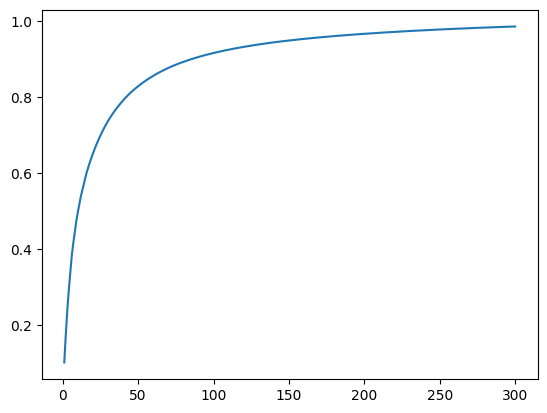

In [16]:
from matplotlib import pyplot as plt
print(len(X.columns))
n_components=300
pca=PCA(n_components=n_components)
pca.fit(X)

ks=np.arange(1,n_components+1)
plt.plot(ks,np.cumsum(pca.explained_variance_ratio_))
Xs=pca.transform(X)



In [17]:
n_cluster=np.arange(5,16)
pca_dimension=[20,35,50,75,100,150,200,300]

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import rand_score
from tqdm import tqdm_notebook
import csv
import time
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  write = csv.writer(f)
  write.writerow(pca_dimension)
  write.writerow(n_cluster)
  for i,pc in enumerate(pca_dimension):
    print("pca: ",pc)
    result=[]
    times=[]
    for n in tqdm_notebook(n_cluster):
      pca=PCA(n_components=pc)
      pca.fit(X)
      Xs=pca.transform(X)
      sti=time.time()
      sc=SpectralClustering(n)
      times.append(time.time()-sti)
      pred=sc.fit_predict(Xs)
      result.append( rand_score(y,pred))
    write.writerow(result)
    write.writerow(times)
    print(result)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
pca:  20


<ipython-input-18-16f85ed59e63>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(n_cluster):


  0%|          | 0/11 [00:00<?, ?it/s]